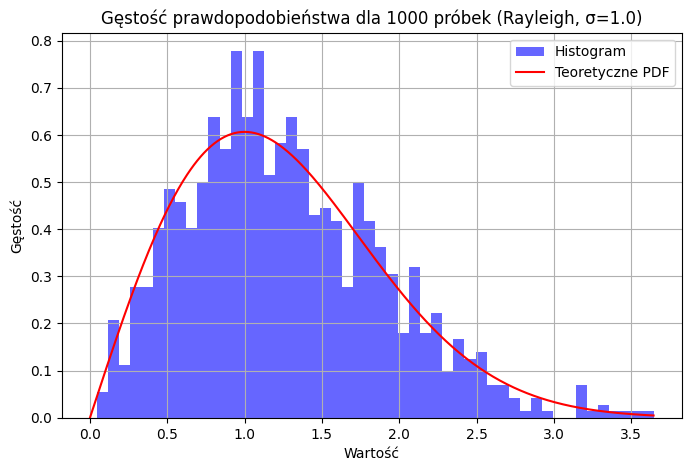

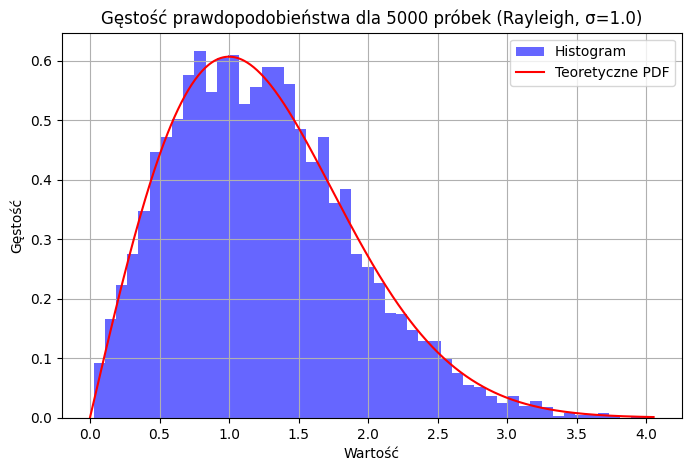

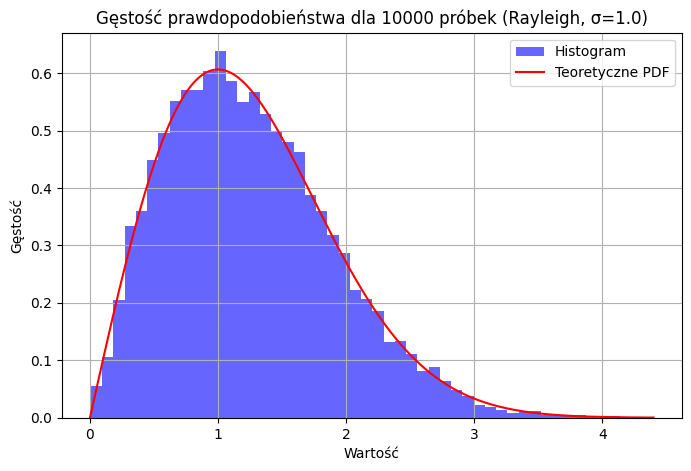

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Parametry
sigma = 1.0  # Rayleigh scale parameter
sample_sizes = [1000, 5000, 10000]  # różna liczba próbek

# Symulacja szumu białego o rozkładzie Rayleigha
data_simulations = {size: np.random.rayleigh(scale=sigma, size=size) for size in sample_sizes}

# Funkcja do rysowania histogramu gęstości i wykresu PDF
def plot_pdf(data, size):
    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=50, density=True, alpha=0.6, color='b', label="Histogram")
    x = np.linspace(0, max(data), 500)
    pdf = (x / sigma**2) * np.exp(-x**2 / (2 * sigma**2))  # wzór na PDF rozkładu Rayleigha
    plt.plot(x, pdf, 'r', label='Teoretyczne PDF')
    plt.title(f'Gęstość prawdopodobieństwa dla {size} próbek (Rayleigh, σ={sigma})')
    plt.xlabel('Wartość')
    plt.ylabel('Gęstość')
    plt.legend()
    plt.grid(True)
    plt.show()

# Rysowanie histogramów dla każdej liczby próbek
for size, data in data_simulations.items():
    plot_pdf(data, size)


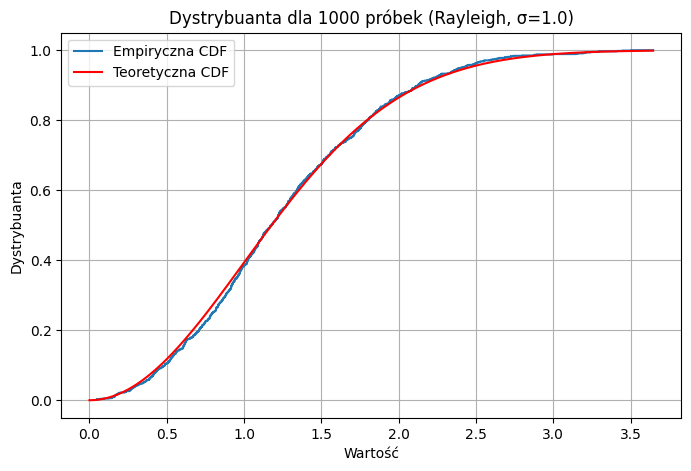

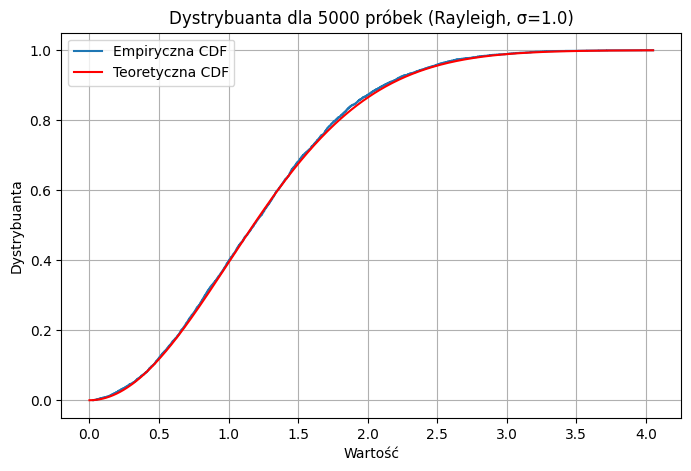

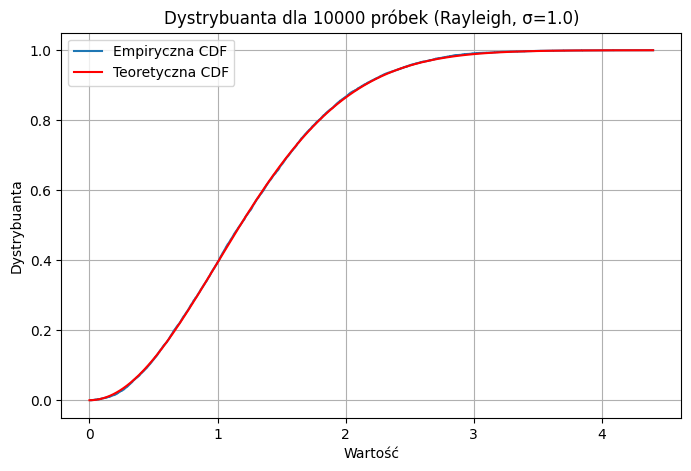

,Liczba próbek,Wartość oczekiwana,Wariancja,Kowariancja
0,1000,1.261600,0.407109,"[0.40710945652005304, -0.010009245715688087, 0..."
1,5000,1.242940,0.420397,"[0.42039738968115997, -0.011196022149320625, 0..."
2,10000,1.252297,0.423687,"[0.42368687862850146, 0.0012990087150339222, -..."


In [3]:
# Funkcja do rysowania dystrybuanty (CDF) i porównanie z teoretyczną CDF
def plot_cdf(data, size):
    plt.figure(figsize=(8, 5))
    # Dystrybuanta empiryczna
    ecdf = np.sort(data)
    ecdf_vals = np.arange(1, len(data) + 1) / len(data)
    plt.step(ecdf, ecdf_vals, label='Empiryczna CDF')
    
    # Teoretyczna CDF dla rozkładu Rayleigha
    x = np.linspace(0, max(data), 500)
    cdf = 1 - np.exp(-x**2 / (2 * sigma**2))
    plt.plot(x, cdf, 'r', label='Teoretyczna CDF')
    
    plt.title(f'Dystrybuanta dla {size} próbek (Rayleigh, σ={sigma})')
    plt.xlabel('Wartość')
    plt.ylabel('Dystrybuanta')
    plt.legend()
    plt.grid(True)
    plt.show()

# Rysowanie wykresów CDF dla każdej liczby próbek
for size, data in data_simulations.items():
    plot_cdf(data, size)

# Obliczenia statystyczne (wartość oczekiwana, wariancja) oraz funkcja kowariancyjna
stats_results = {}

for size, data in data_simulations.items():
    mean = np.mean(data)
    variance = np.var(data)
    
    # Funkcja autokowariancji
    autocov = np.correlate(data - mean, data - mean, mode='full') / size
    autocov = autocov[autocov.size // 2:]  # wybór tylko połowy, bo funkcja jest symetryczna

    stats_results[size] = {
        "Wartość oczekiwana": mean,
        "Wariancja": variance,
        "Kowariancja": autocov
    }

# Wyświetlenie wyników w postaci tabeli (wartość oczekiwana i wariancja)
import pandas as pd

stats_df = pd.DataFrame({
    "Liczba próbek": sample_sizes,
    "Wartość oczekiwana": [stats_results[size]["Wartość oczekiwana"] for size in sample_sizes],
    "Wariancja": [stats_results[size]["Wariancja"] for size in sample_sizes],
    "Kowariancja": [stats_results[size]["Kowariancja"] for size in sample_sizes]
})

stats_df

In [5]:
stats_df["Kowariancja"][0]

array([ 4.07109457e-01, -1.00092457e-02,  1.46182293e-02,  1.95727802e-02,
        9.07287507e-03, -9.38877811e-03, -4.33199619e-04,  5.82323272e-03,
       -7.01983182e-03,  1.12354541e-02, -6.20524091e-04,  1.44857808e-03,
       -5.61580010e-03,  3.89624798e-03, -7.56817180e-03,  1.70500957e-02,
       -1.82067354e-02, -2.55641829e-03,  9.59279518e-04, -1.16064150e-02,
       -2.56474246e-02, -2.06253051e-02,  1.47985410e-02, -4.20712487e-03,
        6.12556795e-04,  5.23700080e-03,  1.85006029e-02, -2.79533431e-02,
       -2.18885417e-02,  9.97405829e-03, -8.05535441e-03, -1.85197358e-02,
       -6.16854362e-03, -2.63513921e-03, -7.64821449e-03,  1.70273934e-02,
       -6.26869531e-03,  1.29952754e-02, -1.54115157e-03,  3.71667498e-03,
       -2.44635195e-02, -2.76734734e-02, -1.71727513e-02,  9.47506109e-03,
        9.57506033e-03, -3.58698379e-03,  6.57916666e-05,  2.03679366e-04,
        9.53591696e-03,  1.86884184e-02,  1.40891574e-02, -1.10938277e-02,
        8.98014949e-03,  